In [1]:
#First Read Data 
#Importeded Needed Libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
path='D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\Classification Example_1(Data).txt'
data=pd.read_csv( path, header=None,names=['Exam 1','Exam 2','Admitted'])
print('Data')
print(data.head(10))
print('***'*50)
print(data.describe())

Data
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
******************************************************************************************************************************************************
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [9]:
#Second Classifier data to positive = 1 , and negative = 0
positive=data[data['Admitted'].isin([1])]
negative=data[data['Admitted'].isin([0])]
print('Admitted Student Is ==> \n',positive)
print('==='*30)
print('NonAdmitted Student Is ==> \n',negative)
print('==='*30)

Admitted Student Is ==> 
     Ones     Exam 1     Exam 2  Admitted
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
6      1  61.106665  96.511426         1
7      1  75.024746  46.554014         1
8      1  76.098787  87.420570         1
9      1  84.432820  43.533393         1
12     1  82.307053  76.481963         1
13     1  69.364589  97.718692         1
15     1  53.971052  89.207350         1
16     1  69.070144  52.740470         1
18     1  70.661510  92.927138         1
19     1  76.978784  47.575964         1
21     1  89.676776  65.799366         1
24     1  77.924091  68.972360         1
25     1  62.271014  69.954458         1
26     1  80.190181  44.821629         1
30     1  61.379289  72.807887         1
31     1  85.404519  57.051984         1
33     1  52.045405  69.432860         1
37     1  64.176989  80.908061         1
40     1  83.902394  56.308046         1
42     1  94.443368  65.568922         1
46     1  77.193035  70.458200 

Text(60.5, 12, 'Classification')

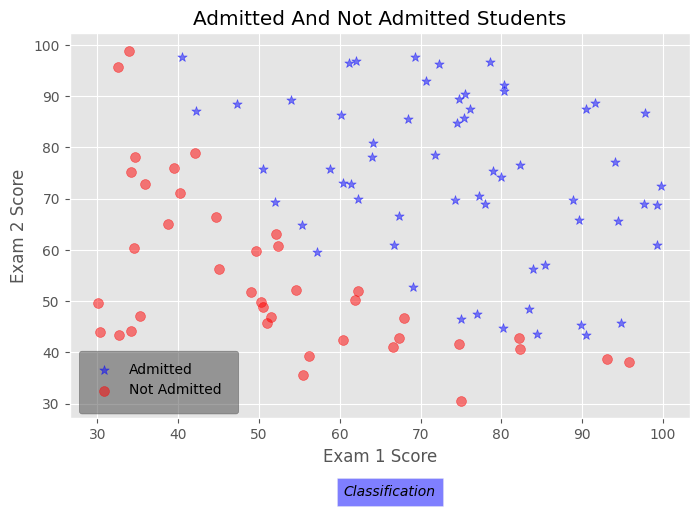

In [16]:
#To Draw The Data 
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(8,5))
ax.set(title='Admitted And Not Admitted Students',xlabel='Exam 1 Score',ylabel='Exam 2 Score')
ax.scatter(positive['Exam 1'],positive['Exam 2'],color='blue',marker='*',s=50,alpha=0.5,label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],marker='o',s=50,alpha=0.5,color='red',label='Not Admitted')
ax.legend(loc='lower left',frameon=True,fancybox='True',framealpha=0,shadow=True,borderpad=1)
plt.text(60.5,12,'Classification',style='italic',color='black',bbox={'facecolor':'blue','alpha':0.5,'pad':5})

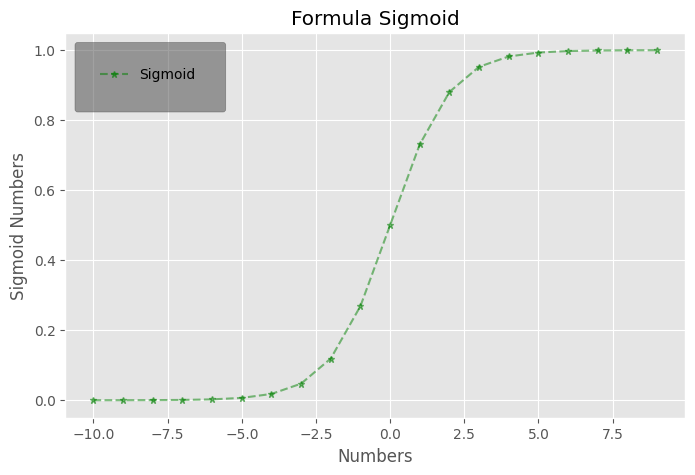

In [22]:
#Create Sigmoid Function And Draw Plots Between Sigmoid & Numbers
def sigmoid(nums):
    return 1 / (1+np.exp(-nums))
numbers=np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(8,5))
plt.style.use('ggplot')
ax.set(title='Formula Sigmoid',xlabel= 'Numbers',ylabel='Sigmoid Numbers')
ax.plot(numbers,sigmoid(numbers),linestyle='dashed',marker='*',alpha=0.5,markersize=5,label='Sigmoid',color='green')
ax.legend(loc='upper left',fancybox=True,frameon=True,framealpha=0,shadow=True,borderpad=2)

In [27]:
path='D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\Classification Example_1(Data).txt'
data=pd.read_csv( path, header=None,names=['Exam 1','Exam 2','Admitted'])
#Add New Columns Is Called Ones Becuase this makes the matrix multiplications work out easier 
data.insert(0,'Ones',1)
print('\t\tThe New Data Is \n',data.head(15))
print('==='*30)
#Set X (Training Data) and Y is (Target Data)
cols=data.shape[1]
xtraining_data=data.iloc[:,0:cols-1]
ytarget_data=data.iloc[:,cols-1:cols]
print('\t\t The Training Data \n',xtraining_data.head(10))
print('==='*30)
print('\t\t The Target Data \n',ytarget_data.head(10))
print('==='*30)

		The New Data Is 
     Ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
5      1  45.083277  56.316372         0
6      1  61.106665  96.511426         1
7      1  75.024746  46.554014         1
8      1  76.098787  87.420570         1
9      1  84.432820  43.533393         1
10     1  95.861555  38.225278         0
11     1  75.013658  30.603263         0
12     1  82.307053  76.481963         1
13     1  69.364589  97.718692         1
14     1  39.538339  76.036811         0
		 The Training Data 
    Ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376
5     1  45.083277  56.316372
6     1  61.106665  96.511426
7     1  75.024746  46.554014
8     1  76.098787  87.420570
9

In [31]:
#Create Cost Function To Calcualte The Values Of Cost Error
def cost_function(thetav,x_values,y_values):
    thetav=np.matrix(thetav)
    xv=np.matrix(x_values)
    yv=np.matrix(y_values)
    first =np.multiply(-yv,np.log(sigmoid(xv * thetav.T)))
    second=np.multiply((1-yv),np.log(1-sigmoid(xv * thetav.T)))
    return np.sum(first - second)/ len(xv)

In [36]:
#Convert Training Data & Target Data To Matrix Because Intalize The Parameters Array Theta
xm=np.array(xtraining_data.values)
ym=np.array(ytarget_data.values)
print('\t\t The Matrix Of Training Data \n',xm[0:10,:])
print('==='*30)
print('\t\t The Matrix Of Target Data \n',ym[0:10,:])
print('==='*30)
#Create Theta Matrix , Theta 0 =0 ,Theta 1 = 0 ,Theta 2 =0
theta=np.zeros(3)
print('The Shape Of X Matrix Is ==> ',xm.shape)#The Shape Of X Matrix Is ==>  (100, 3)
print('The Shape Of Y Matrix Is ==> ',ym.shape)#The Shape Of X Matrix Is ==>  (100, 1)
print(theta)#[0. 0. 0.]
print('The Shape Of Theta Matrix Is => ',theta.shape)#The Shape Of Theta Matrix Is =>  (3,)
#***********************************************************************************************
#Called Cost Function 
thiscost=cost_function(theta,xm,ym)
print('The Cost Function Is ==> ',thiscost) #The Cost Function Is ==>  0.6931471805599453

		 The Matrix Of Training Data 
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]]
		 The Matrix Of Target Data 
 [[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]
The Shape Of X Matrix Is ==>  (100, 3)
The Shape Of Y Matrix Is ==>  (100, 1)
[0. 0. 0.]
The Shape Of Theta Matrix Is =>  (3,)
The Cost Function Is ==>  0.6931471805599453
